In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
credit_risk_df = pd.read_csv('dataset/credit_risk_dataset.csv')
credit_risk_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
credit_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
credit_risk_df.describe() 

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [6]:
# removing person age of above 100 in the process of cleaning data as it may be human error or rare case(outliers)
credit_risk_df = credit_risk_df[credit_risk_df['person_age'] < 100]
credit_risk_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32576.000000,3.257600e+04,31681.000000,32576.000000,29461.000000,32576.000000,32576.000000,32576.000000
mean,27.718044,6.588214e+04,4.789527,9589.117755,11.011547,0.218197,0.170212,5.803966
std,6.204990,5.253499e+04,4.142706,6321.886846,3.240623,0.413029,0.106778,4.053791
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,94.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
categorical_col = credit_risk_df.select_dtypes(include=["object"]).columns
numeric_col = credit_risk_df.select_dtypes(include=["int", "float"]).columns


In [8]:
correlation_matrix = credit_risk_df[numeric_col].corr()
correlation_matrix

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.140404,0.166249,0.051566,0.011967,-0.020721,-0.041665,0.878092
person_income,0.140404,1.000000,0.152717,0.317482,-0.001243,-0.168507,-0.294525,0.123006
person_emp_length,0.166249,0.152717,1.000000,0.113142,-0.056440,-0.082475,-0.054047,0.144487
loan_amnt,0.051566,0.317482,0.113142,1.000000,0.146879,0.105411,0.572567,0.042119
loan_int_rate,0.011967,-0.001243,-0.056440,0.146879,1.000000,0.335169,0.120414,0.016639
loan_status,-0.020721,-0.168507,-0.082475,0.105411,0.335169,1.000000,0.379374,-0.015504
loan_percent_income,-0.041665,-0.294525,-0.054047,0.572567,0.120414,0.379374,1.000000,-0.031514
cb_person_cred_hist_length,0.878092,0.123006,0.144487,0.042119,0.016639,-0.015504,-0.031514,1.000000


In [100]:
def plot_age_distribution_using_histogram(credit_risk_df):
    '''
    Plotting Histogram for the age distribution of loan Applicants.

    Parameters:
        credit_risk_df (dataframe): The Dataframe containing the age column.
    '''
    plt.figure(figsize=(6, 6))
    sns.histplot(data=credit_risk_df, x='person_age', bins=30)
    plt.title("Distribution of Applicant's Age", fontsize=13, fontweight='bold')
    plt.xlabel("Age", fontsize=15, fontweight='bold')
    plt.ylabel("Frequency", fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.savefig('Histogram_age_distibution.png')
    plt.show()

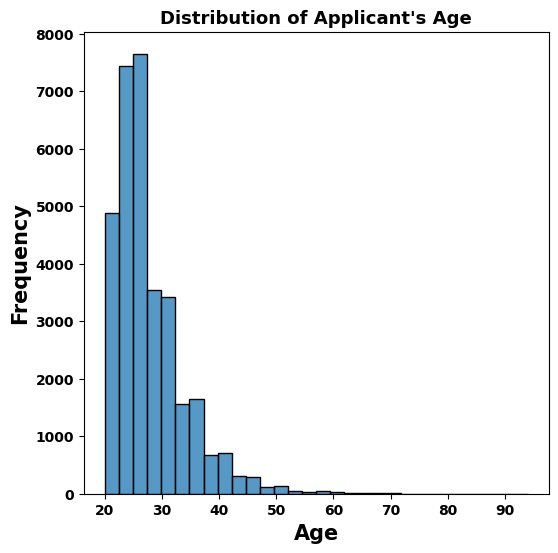

In [102]:
plot_age_distribution_using_histogram(credit_risk_df)

In [104]:
def count_plot_loan_intent_for_defaulters(defaulters):
    '''
    Plotting count plot to compare the different types of loan intents who failed to pay back the loan

    Parameters:
        defaulters (Dataframe): The Dataframe containing only defaulters 
    '''
    plt.figure(figsize=(8, 6))
    sns.countplot(x='loan_intent', data=defaulters, hue='loan_intent')
    plt.xticks(rotation=45)
    plt.title("Count of Each Loan Intent Category", fontweight='bold')
    plt.xlabel("Loan Intent", fontsize=15, fontweight='bold')
    plt.ylabel("Count", fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.savefig('count_plot_loan_intent_for_defaulters.png', bbox_inches='tight')
    # plt.legend()
    plt.show()

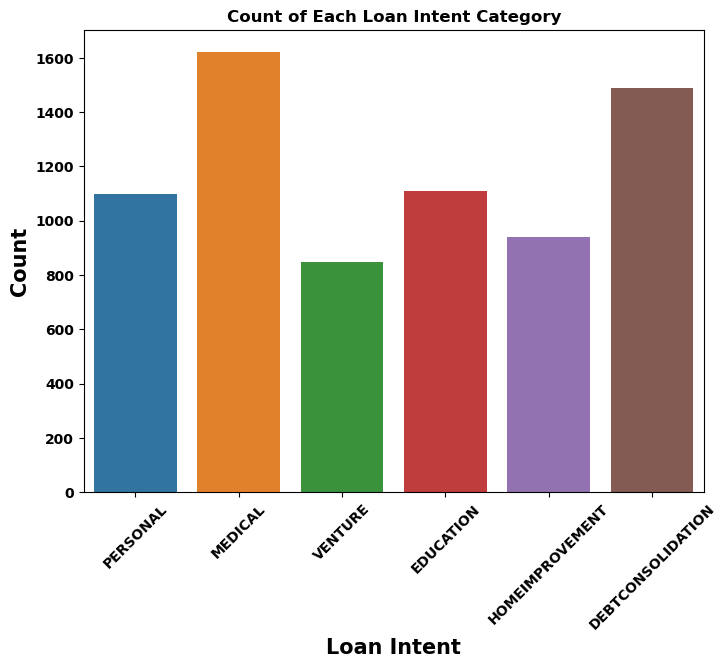

In [106]:
defaulters = credit_risk_df[credit_risk_df['loan_status'] == 1]
count_plot_loan_intent_for_defaulters(defaulters)

In [108]:
def plot_home_ownership_status_for_applicants(credit_risk_df):
    '''
    Plotting the countplot to visualize the comparison of home ownership of appplicants

    Parameters:
        credit_risk_df(Dataframe): The Dataframe containing loan_status and person_home_ownership(categorical data)
    '''
    plt.figure(figsize=(8, 5))
    sns.countplot(data=credit_risk_df, x='person_home_ownership', hue='loan_status')
    plt.xlabel("Applicant's Home Ownership Status", fontsize=12, fontweight='bold')
    plt.ylabel("Count of Each Home Ownership Status", fontsize=12, fontweight='bold')
    plt.title("Relationship between Applicant's home ownership and loan status", fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.savefig('plot_home_ownership_status_for_applicants.png', bbox_inches='tight')
    plt.show()

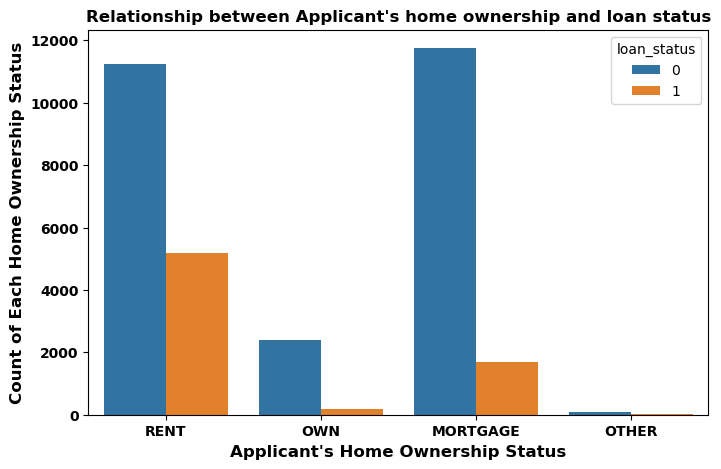

In [110]:
plot_home_ownership_status_for_applicants(credit_risk_df)

In [112]:
def plot_heatmap_for_correlation_matrix(correlation_matrix):
    '''
    Plotting the heatmap of correlation matrix using correlation dataframe.
    
    Parameters:
        correlation_matrix (dataframe): The dataframe containing the correlation data for all numerical columns.
    '''
    plt.figure(figsize=(8, 5), dpi=300)
    sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of Numerical Features", fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.savefig('heatmap.png', bbox_inches='tight')
    plt.show()

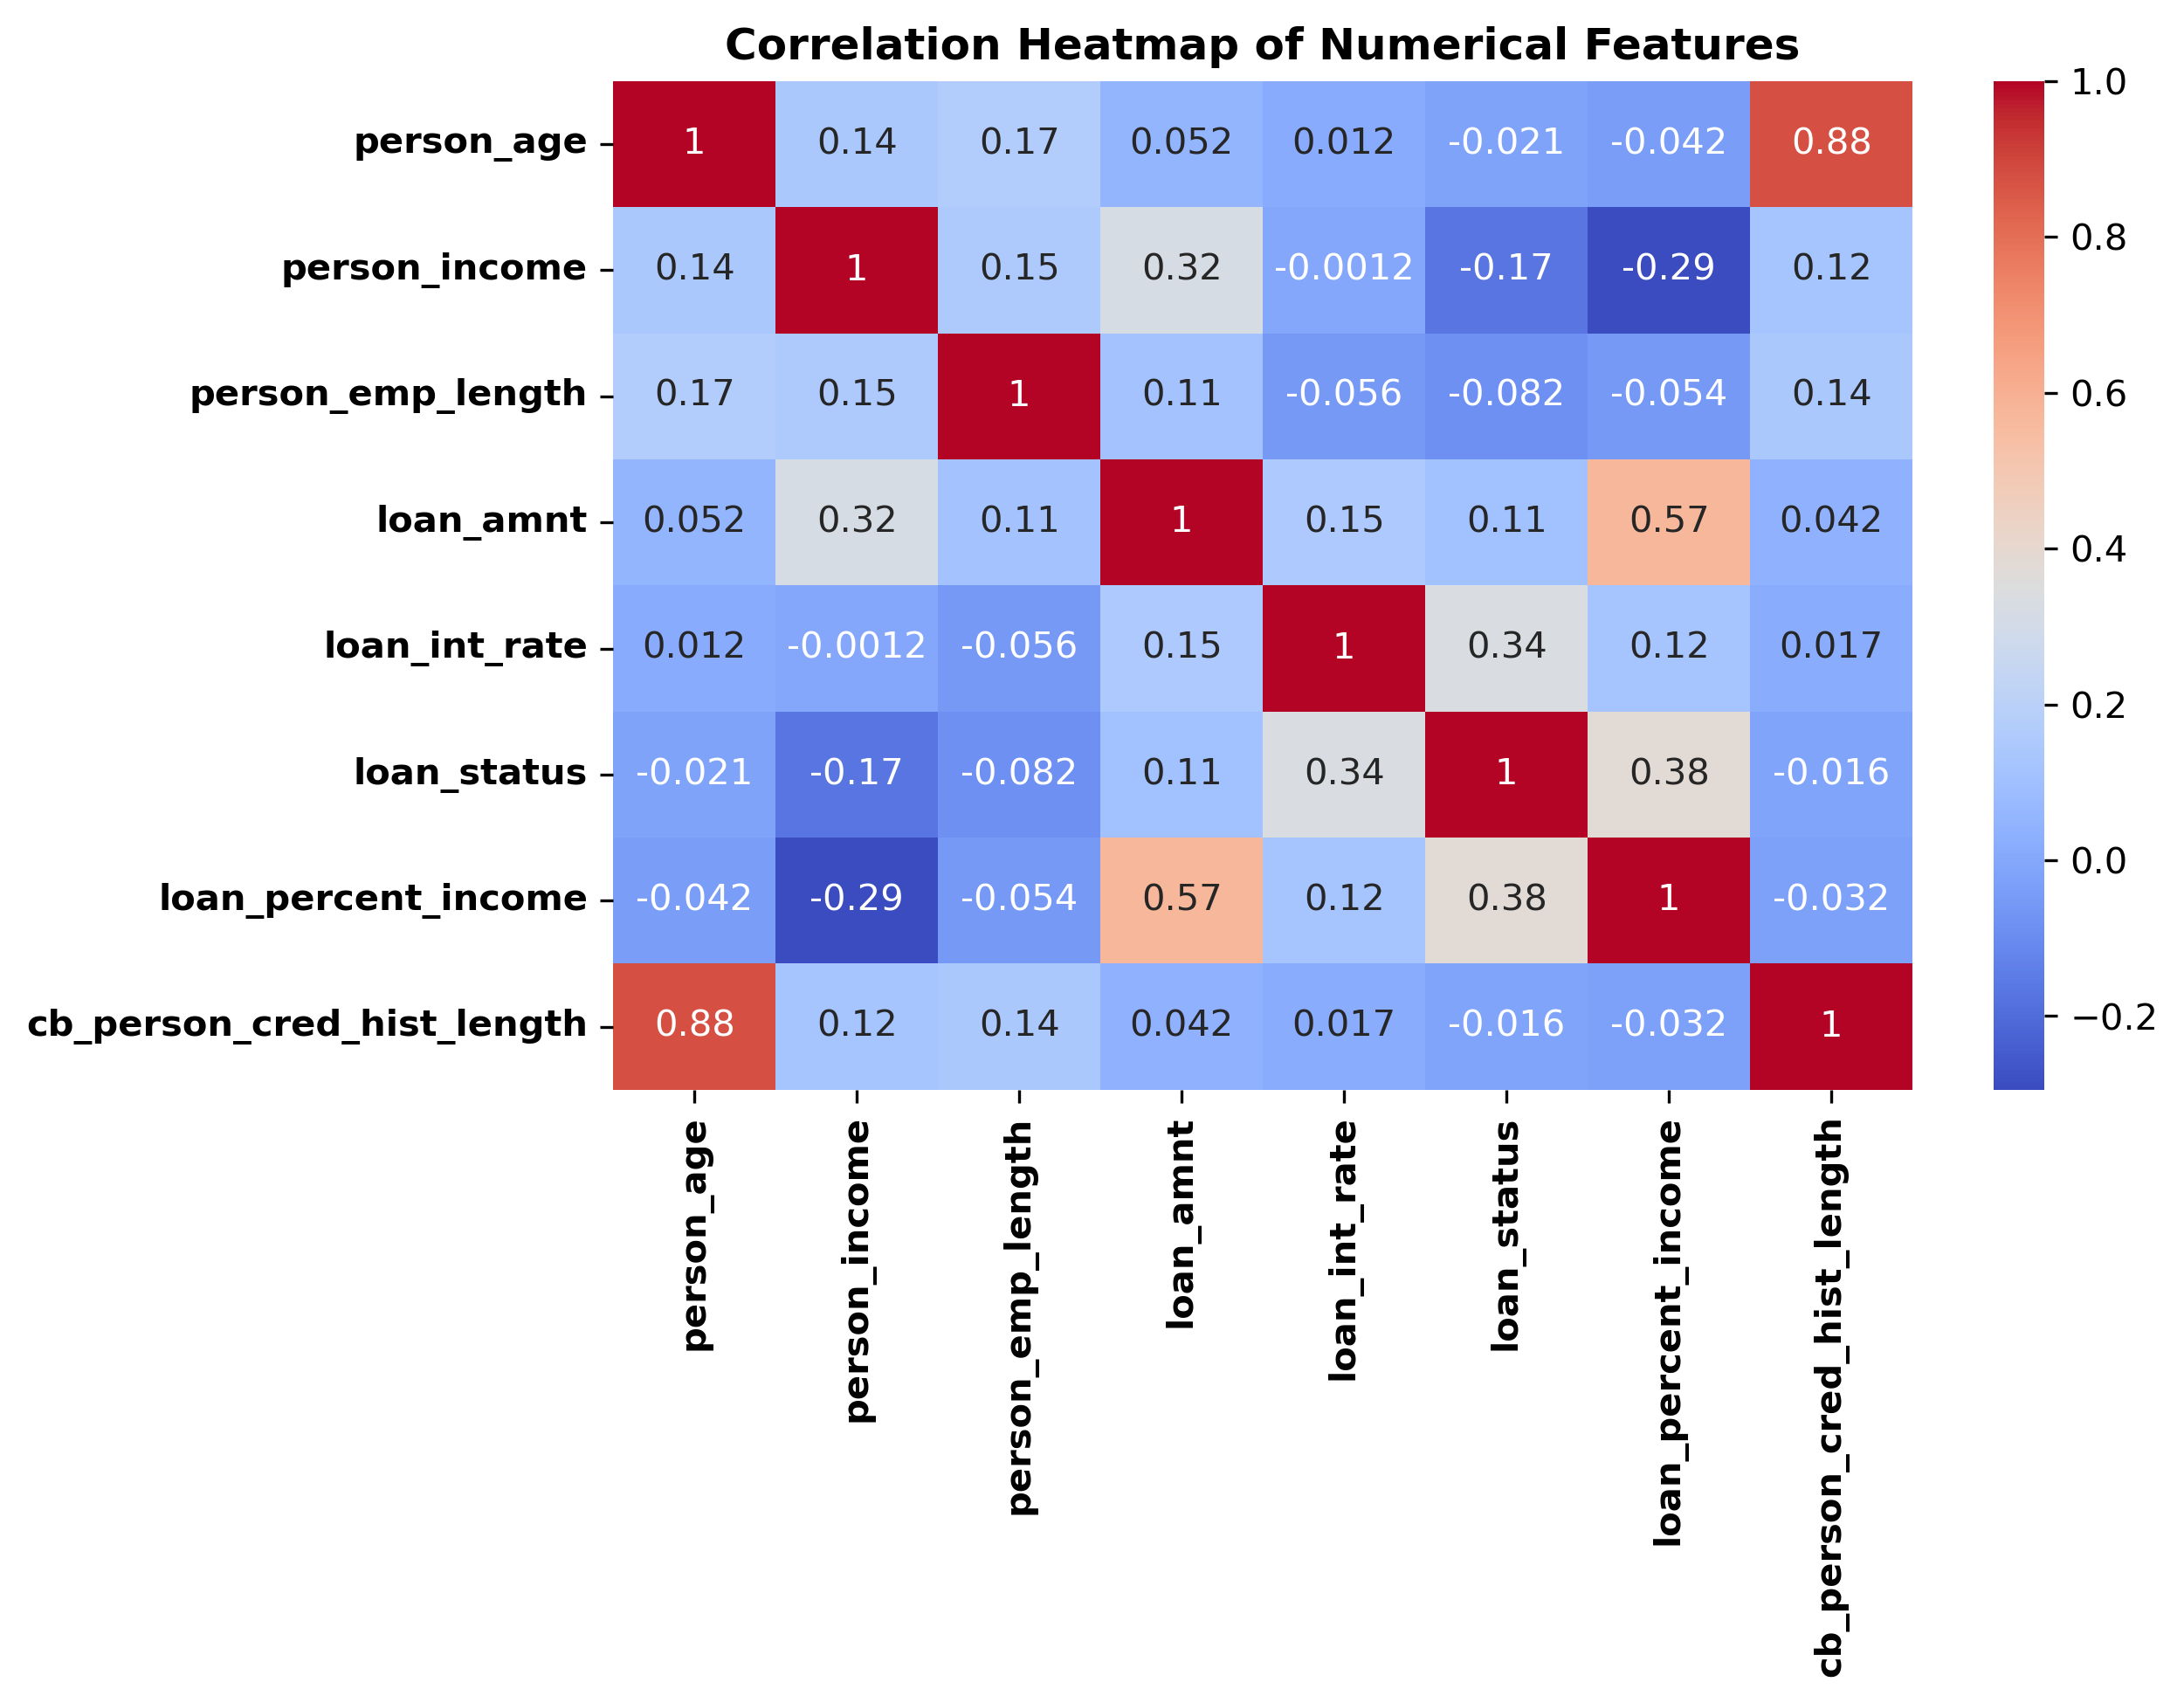

In [114]:
plot_heatmap_for_correlation_matrix(correlation_matrix)

In [116]:
def plot_scatter_plot_person_income_against_loan_amnt(credit_risk_df):
    '''
    Plotting the scatter plot for applicants's income against the loan amount
    '''
    plt.figure(figsize=(8, 6))
    credit_risk_df['log10_income'] = np.log10(credit_risk_df['person_income'])
    sns.scatterplot(data=credit_risk_df, x='log10_income', y='loan_amnt', hue='loan_status', marker='o', color='red')
    plt.title("Person Income vs Loan Amount", fontsize=14, fontweight='bold')
    plt.xlabel("Annual Income", fontsize=15, fontweight='bold')
    plt.ylabel("Loan Amount", fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    # plt.xlim(0, 0.25)
    plt.savefig('plot_scatter_plot_person_income_against_loan_amnt.png')
    plt.show()

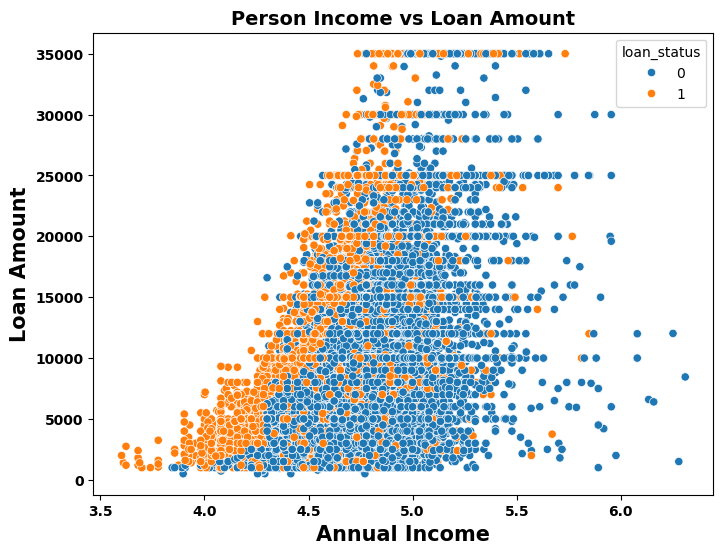

In [118]:
plot_scatter_plot_person_income_against_loan_amnt(credit_risk_df)

In [124]:
def plot_box_plot_for_loan_amount(defaulters):
    '''
    Plotting box plot to visualize the loan amount's mean median and outliers

    Parameters:
        credit_risk_df (DataFrame): The dataframe containing the loan amount got by applicants
    '''
    plt.figure(figsize=(5, 7))
    sns.boxplot(y='loan_amnt', data=defaulters, orient='v')
    mean_val = np.mean(defaulters['loan_amnt'])
    median_val = np.median(defaulters['loan_amnt'])
    plt.title('Loan Amount Box Plot')
    plt.xlabel(f'Mean Value: {mean_val:.1f}, Median Value: {median_val:.2f}', fontweight='bold')
    plt.ylabel('Loan amount in Pounds £', fontsize=15, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.savefig('plot_box_plot_for_loan_amount.png', bbox_inches='tight')
    plt.show()


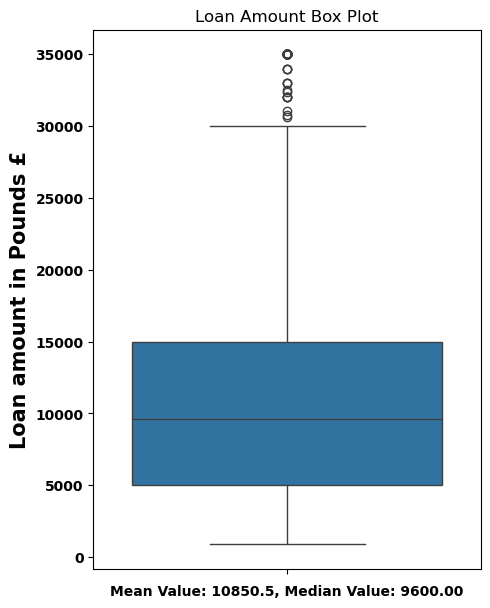

In [126]:
plot_box_plot_for_loan_amount(defaulters)